In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train_dialy = pd.DataFrame(pd.read_csv('dialy_data.csv'))
data_dialy=pd.read_csv('dialy_data.csv')
data_dialy.head()

,Date,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy
0,2/1/2016,0.103750,9.447917,3.113750,0.321667,79.454583,4.694583,29.228750,30.019583,20256
1,2/2/2016,0.798333,3.941250,6.992500,6.215417,93.597500,13.290833,28.911667,29.697917,1761
2,2/3/2016,0.864583,8.699583,1.615000,0.022917,85.001667,16.726250,29.026667,29.814583,2775
3,2/4/2016,0.372917,10.000000,-2.472500,-5.886250,74.522500,9.455417,29.455000,30.254583,28695
4,2/5/2016,0.515417,9.206667,-2.002917,-4.152083,82.027500,5.920000,29.550833,30.351250,9517


In [77]:
train_dialy.isnull(). sum()

Date                 0
Cloud coverage       0
Visibility           0
Temperature          0
Dew point            0
Relative humidity    0
Wind speed           0
Station pressure     0
Altimeter            0
Solar energy         0
month                0
day                  0
dtype: int64

In [8]:
train_dialy

,Date,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy
0,2/1/2016,0.103750,9.447917,3.113750,0.321667,79.454583,4.694583,29.228750,30.019583,20256
1,2/2/2016,0.798333,3.941250,6.992500,6.215417,93.597500,13.290833,28.911667,29.697917,1761
2,2/3/2016,0.864583,8.699583,1.615000,0.022917,85.001667,16.726250,29.026667,29.814583,2775
3,2/4/2016,0.372917,10.000000,-2.472500,-5.886250,74.522500,9.455417,29.455000,30.254583,28695
4,2/5/2016,0.515417,9.206667,-2.002917,-4.152083,82.027500,5.920000,29.550833,30.351250,9517
...,...,...,...,...,...,...,...,...,...,...
632,10/25/2017,0.226667,10.000000,5.873333,2.892917,82.331250,5.555000,29.037917,29.827917,13737
633,10/26/2017,0.011667,10.000000,10.588750,5.315000,72.742917,9.606250,28.966667,29.756667,27465
634,10/27/2017,0.893333,10.000000,5.793333,0.041250,67.364583,13.622917,29.080417,29.870417,15797
635,10/28/2017,0.992917,9.667500,3.431250,-0.111667,77.866250,9.671250,29.145833,29.937083,6400


In [9]:
data_dialy.describe()

,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000
mean,0.382653,9.137993,14.202875,9.623165,72.416289,8.631052,28.592114,30.022427,21521.733124
std,0.313158,1.416147,9.484466,9.334165,13.711698,4.082785,2.683676,0.187620,10843.988912
min,0.000000,1.153750,-16.062917,-18.715417,21.253750,1.031250,8.593750,29.475417,580.000000
25%,0.118333,8.842083,7.361250,3.217083,65.307083,5.667083,29.055000,29.910833,12268.000000
50%,0.314583,9.853333,16.260833,10.795833,73.689583,8.168750,29.201667,30.024583,23094.000000
75%,0.618333,10.000000,22.339167,17.329167,82.331250,10.910000,29.313333,30.134167,30307.000000
max,1.000000,10.000000,28.177500,25.019583,97.845000,24.824583,29.864583,30.671250,40245.000000


In [10]:
data_dialy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               637 non-null    object 
 1   Cloud coverage     637 non-null    float64
 2   Visibility         637 non-null    float64
 3   Temperature        637 non-null    float64
 4   Dew point          637 non-null    float64
 5   Relative humidity  637 non-null    float64
 6   Wind speed         637 non-null    float64
 7   Station pressure   637 non-null    float64
 8   Altimeter          637 non-null    float64
 9   Solar energy       637 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 49.9+ KB


In [11]:
train_dialy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               637 non-null    object 
 1   Cloud coverage     637 non-null    float64
 2   Visibility         637 non-null    float64
 3   Temperature        637 non-null    float64
 4   Dew point          637 non-null    float64
 5   Relative humidity  637 non-null    float64
 6   Wind speed         637 non-null    float64
 7   Station pressure   637 non-null    float64
 8   Altimeter          637 non-null    float64
 9   Solar energy       637 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 49.9+ KB


In [12]:
data_dialy.columns

Index(['Date', 'Cloud coverage', 'Visibility', 'Temperature', 'Dew point',
       'Relative humidity', 'Wind speed', 'Station pressure', 'Altimeter',
       'Solar energy'],
      dtype='object')

In [13]:
data_dialy.shape

(637, 10)

In [14]:
data_dialy.tail()

,Date,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy
632,10/25/2017,0.226667,10.0000,5.873333,2.892917,82.331250,5.555000,29.037917,29.827917,13737
633,10/26/2017,0.011667,10.0000,10.588750,5.315000,72.742917,9.606250,28.966667,29.756667,27465
634,10/27/2017,0.893333,10.0000,5.793333,0.041250,67.364583,13.622917,29.080417,29.870417,15797
635,10/28/2017,0.992917,9.6675,3.431250,-0.111667,77.866250,9.671250,29.145833,29.937083,6400
636,10/29/2017,0.576667,10.0000,4.955833,-0.896250,67.576250,5.533333,29.072083,29.862083,8537


In [15]:
train_dialy['Date'] = pd.to_datetime(train_dialy['Date'])
train_dialy

,Date,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy
0,2016-02-01,0.103750,9.447917,3.113750,0.321667,79.454583,4.694583,29.228750,30.019583,20256
1,2016-02-02,0.798333,3.941250,6.992500,6.215417,93.597500,13.290833,28.911667,29.697917,1761
2,2016-02-03,0.864583,8.699583,1.615000,0.022917,85.001667,16.726250,29.026667,29.814583,2775
3,2016-02-04,0.372917,10.000000,-2.472500,-5.886250,74.522500,9.455417,29.455000,30.254583,28695
4,2016-02-05,0.515417,9.206667,-2.002917,-4.152083,82.027500,5.920000,29.550833,30.351250,9517
...,...,...,...,...,...,...,...,...,...,...
632,2017-10-25,0.226667,10.000000,5.873333,2.892917,82.331250,5.555000,29.037917,29.827917,13737
633,2017-10-26,0.011667,10.000000,10.588750,5.315000,72.742917,9.606250,28.966667,29.756667,27465
634,2017-10-27,0.893333,10.000000,5.793333,0.041250,67.364583,13.622917,29.080417,29.870417,15797
635,2017-10-28,0.992917,9.667500,3.431250,-0.111667,77.866250,9.671250,29.145833,29.937083,6400


In [16]:
train_dialy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               637 non-null    datetime64[ns]
 1   Cloud coverage     637 non-null    float64       
 2   Visibility         637 non-null    float64       
 3   Temperature        637 non-null    float64       
 4   Dew point          637 non-null    float64       
 5   Relative humidity  637 non-null    float64       
 6   Wind speed         637 non-null    float64       
 7   Station pressure   637 non-null    float64       
 8   Altimeter          637 non-null    float64       
 9   Solar energy       637 non-null    int64         
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 49.9 KB


In [17]:
train_dialy['month'] = pd.DatetimeIndex(train_dialy['Date']).month

train_dialy['day'] = pd.DatetimeIndex(train_dialy['Date']).day

train_dialy

,Date,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,month,day
0,2016-02-01,0.103750,9.447917,3.113750,0.321667,79.454583,4.694583,29.228750,30.019583,20256,2,1
1,2016-02-02,0.798333,3.941250,6.992500,6.215417,93.597500,13.290833,28.911667,29.697917,1761,2,2
2,2016-02-03,0.864583,8.699583,1.615000,0.022917,85.001667,16.726250,29.026667,29.814583,2775,2,3
3,2016-02-04,0.372917,10.000000,-2.472500,-5.886250,74.522500,9.455417,29.455000,30.254583,28695,2,4
4,2016-02-05,0.515417,9.206667,-2.002917,-4.152083,82.027500,5.920000,29.550833,30.351250,9517,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
632,2017-10-25,0.226667,10.000000,5.873333,2.892917,82.331250,5.555000,29.037917,29.827917,13737,10,25
633,2017-10-26,0.011667,10.000000,10.588750,5.315000,72.742917,9.606250,28.966667,29.756667,27465,10,26
634,2017-10-27,0.893333,10.000000,5.793333,0.041250,67.364583,13.622917,29.080417,29.870417,15797,10,27
635,2017-10-28,0.992917,9.667500,3.431250,-0.111667,77.866250,9.671250,29.145833,29.937083,6400,10,28


In [18]:
train_dialy['Date']=train_dialy[('Date')].values.astype("float64")
train_dialy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               637 non-null    float64
 1   Cloud coverage     637 non-null    float64
 2   Visibility         637 non-null    float64
 3   Temperature        637 non-null    float64
 4   Dew point          637 non-null    float64
 5   Relative humidity  637 non-null    float64
 6   Wind speed         637 non-null    float64
 7   Station pressure   637 non-null    float64
 8   Altimeter          637 non-null    float64
 9   Solar energy       637 non-null    int64  
 10  month              637 non-null    int64  
 11  day                637 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 59.8 KB


month: [ 1  2  3  4  5  6  7  8  9 10 11 12]


Text(0.5, 1.0, 'Production of Solar energy in 2017')

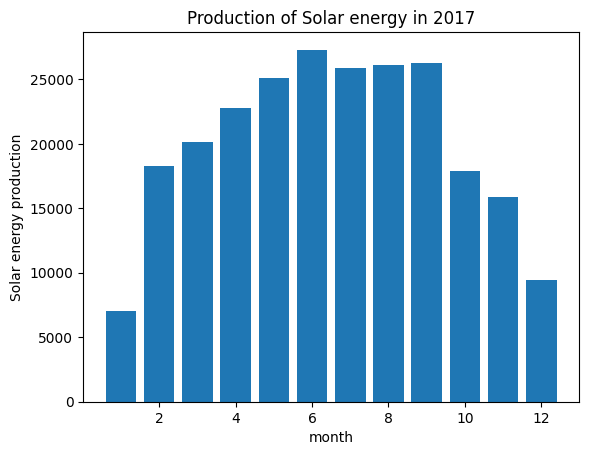

In [19]:
# now let's take a look at the amerage amount of bike use for each hour of the day
# as a "sanity check" to make sure the data makes sense before going further
month = np.unique(train_dialy['month'])
print("month:",month)
n=12
w=0.35
r=np.arange(n)
month_mean = {}
for m in month:
    monthly_df = train_dialy.loc[train_dialy['month'] == m]
    month_mean[m] = monthly_df['Solar energy'].mean()
# plot the results. Maybe should see peaks from bike commuting or evening use
plt.bar(month,[month_mean[m] for m in month])
#plt.xticks(r+w,["jan","feb","march","April","May","June","July","Aug","Sept","Oct","Nov","Dec"])
plt.xlabel("month")
plt.ylabel("Solar energy production")
plt.title("Production of Solar energy in 2017")

C:\Users\ay0231\AppData\Local\Temp\ipykernel_17464\1301669184.py:15: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend((train[2],train[3],train[1],train[4],train[5],train[6],train[7],train[8]),("Visibility","Temperature","Cloud coverage","Dew point","Relative humidity","Wind speed","Station pressure","Altimeter"),loc="best")


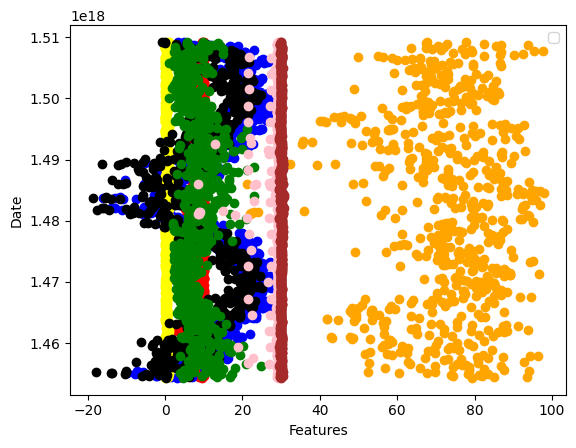

In [61]:
import plotly.express as px

train=data_dialy.columns
fig=plt.scatter(train_dialy["Visibility"], train_dialy["Date"],color="red")
fig=plt.scatter(train_dialy["Temperature"], train_dialy["Date"],color="blue")
plt.scatter(train_dialy["Cloud coverage"], train_dialy["Date"],color="yellow")
plt.scatter(train_dialy["Dew point"], train_dialy["Date"],color="black")
plt.scatter(train_dialy["Relative humidity"], train_dialy["Date"],color="orange")
plt.scatter(train_dialy["Wind speed"], train_dialy["Date"],color="green")
plt.scatter(train_dialy["Station pressure"], train_dialy["Date"],color="pink")
plt.scatter(train_dialy["Altimeter"], train_dialy["Date"],color="brown")
plt.xlabel ("Features")
plt.ylabel ("Date")
train
plt.legend((train[2],train[3],train[1],train[4],train[5],train[6],train[7],train[8]),("Visibility","Temperature","Cloud coverage","Dew point","Relative humidity","Wind speed","Station pressure","Altimeter"),loc="best")
plt.show()


In [21]:
# Temperature;due point;solar energy : wave form
# cloud coverage;visibility;Station pressure;altimeter: stright line
# Relative humidity :scatter

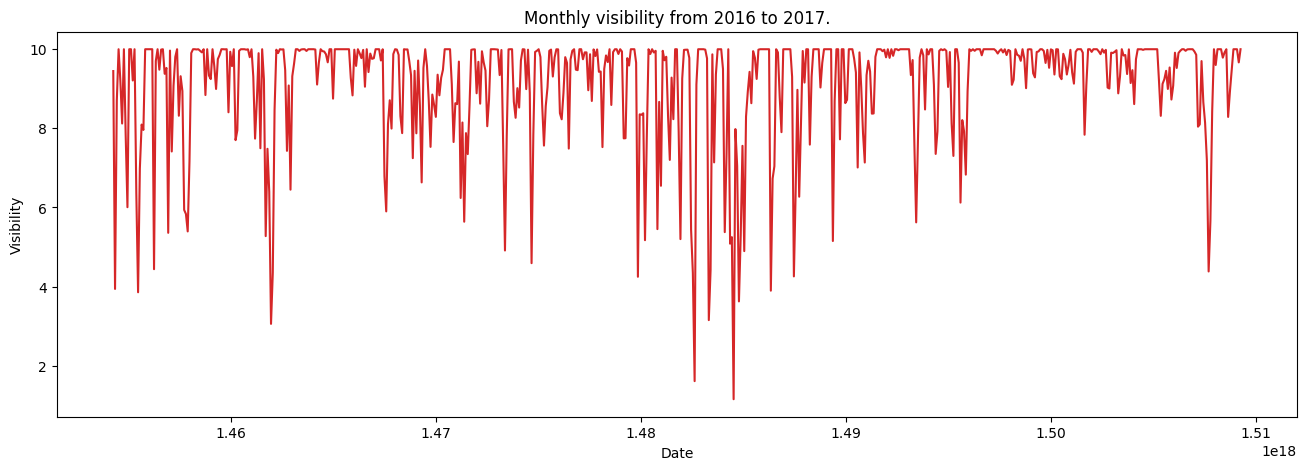

In [62]:
def plot_df(train_dialy, x, y, title="", xlabel='Date', ylabel='Visibility', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(train_dialy, x=train_dialy["Date"], y=train_dialy["Visibility"], title='Monthly visibility from 2016 to 2017.')    

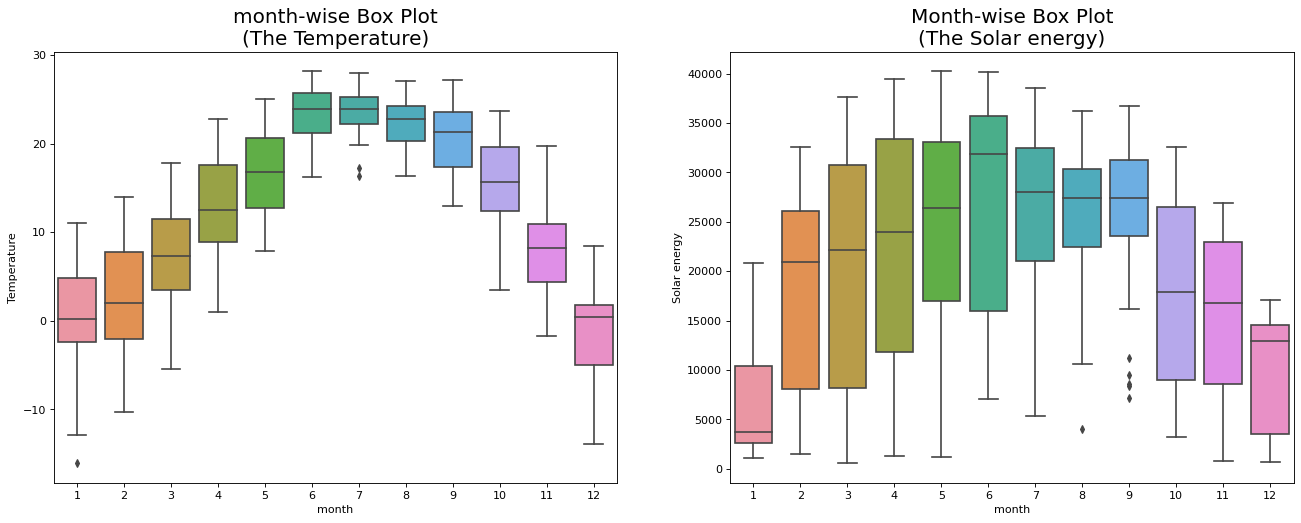

In [63]:
# Draw Plot

fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x=train_dialy['month'], y=train_dialy['Temperature'],ax=axes[0])
sns.boxplot(x=train_dialy['month'], y=train_dialy['Solar energy'])

# Set Title
axes[0].set_title('month-wise Box Plot\n(The Temperature)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Solar energy)', fontsize=18)
plt.show()

C:\Users\ay0231\AppData\Local\Temp\ipykernel_17464\3937075525.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_dialy.corr(),annot=True)


<AxesSubplot: >

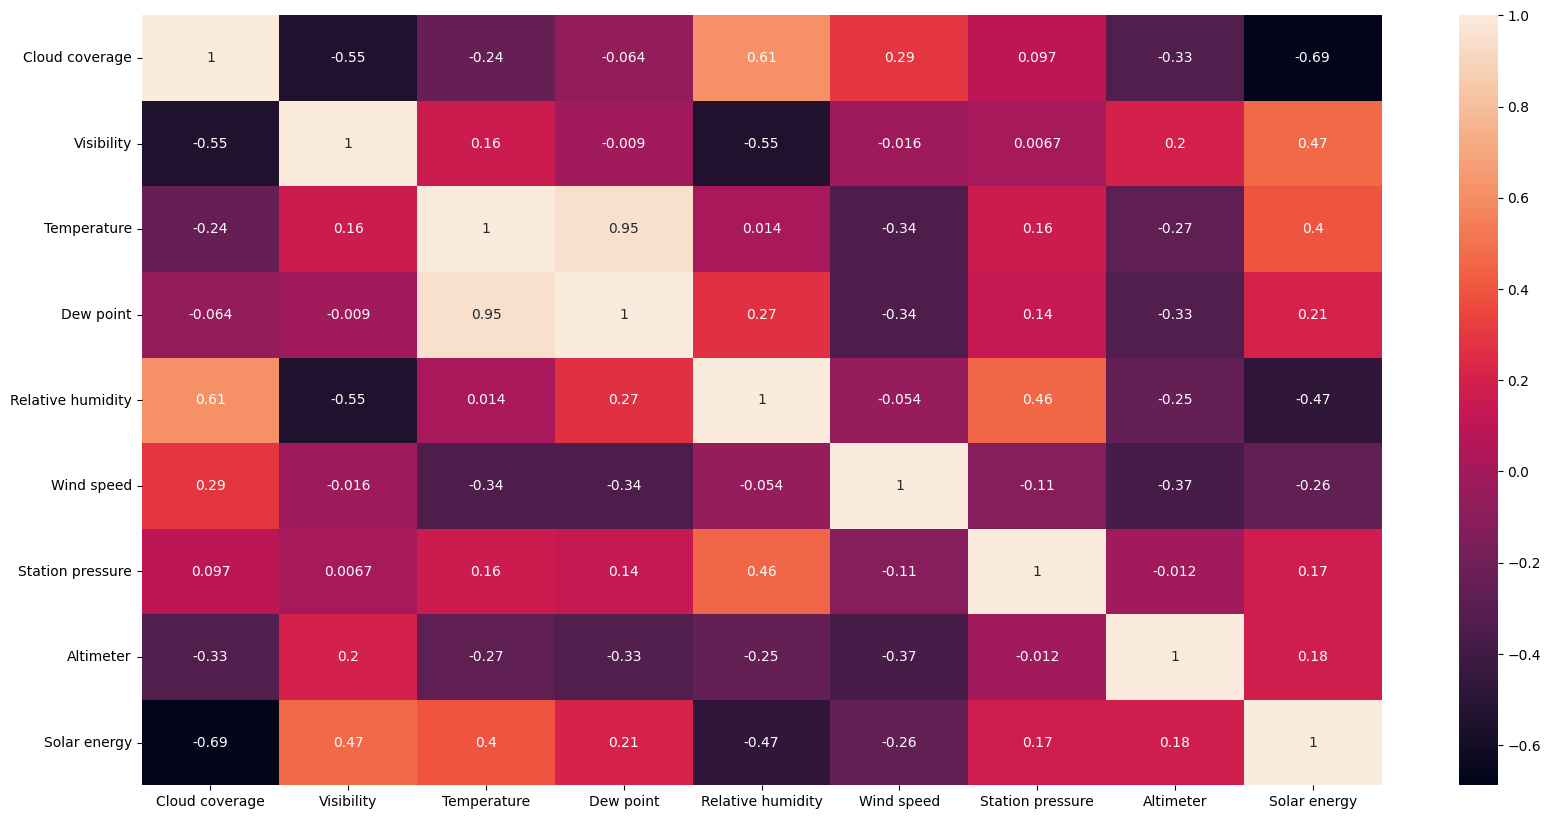

In [69]:
plt.figure(figsize=(20,10))
sns.heatmap(data_dialy.corr(),annot=True)

In [65]:
new_df=train_dialy[['Date', 'Cloud coverage', 'Visibility', 'Temperature', 'Dew point',
       'Relative humidity', 'Wind speed', 'Station pressure', 'Altimeter'
      ]]
new_df

,Date,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter
0,1.454285e+18,0.103750,9.447917,3.113750,0.321667,79.454583,4.694583,29.228750,30.019583
1,1.454371e+18,0.798333,3.941250,6.992500,6.215417,93.597500,13.290833,28.911667,29.697917
2,1.454458e+18,0.864583,8.699583,1.615000,0.022917,85.001667,16.726250,29.026667,29.814583
3,1.454544e+18,0.372917,10.000000,-2.472500,-5.886250,74.522500,9.455417,29.455000,30.254583
4,1.454630e+18,0.515417,9.206667,-2.002917,-4.152083,82.027500,5.920000,29.550833,30.351250
...,...,...,...,...,...,...,...,...,...
632,1.508890e+18,0.226667,10.000000,5.873333,2.892917,82.331250,5.555000,29.037917,29.827917
633,1.508976e+18,0.011667,10.000000,10.588750,5.315000,72.742917,9.606250,28.966667,29.756667
634,1.509062e+18,0.893333,10.000000,5.793333,0.041250,67.364583,13.622917,29.080417,29.870417
635,1.509149e+18,0.992917,9.667500,3.431250,-0.111667,77.866250,9.671250,29.145833,29.937083


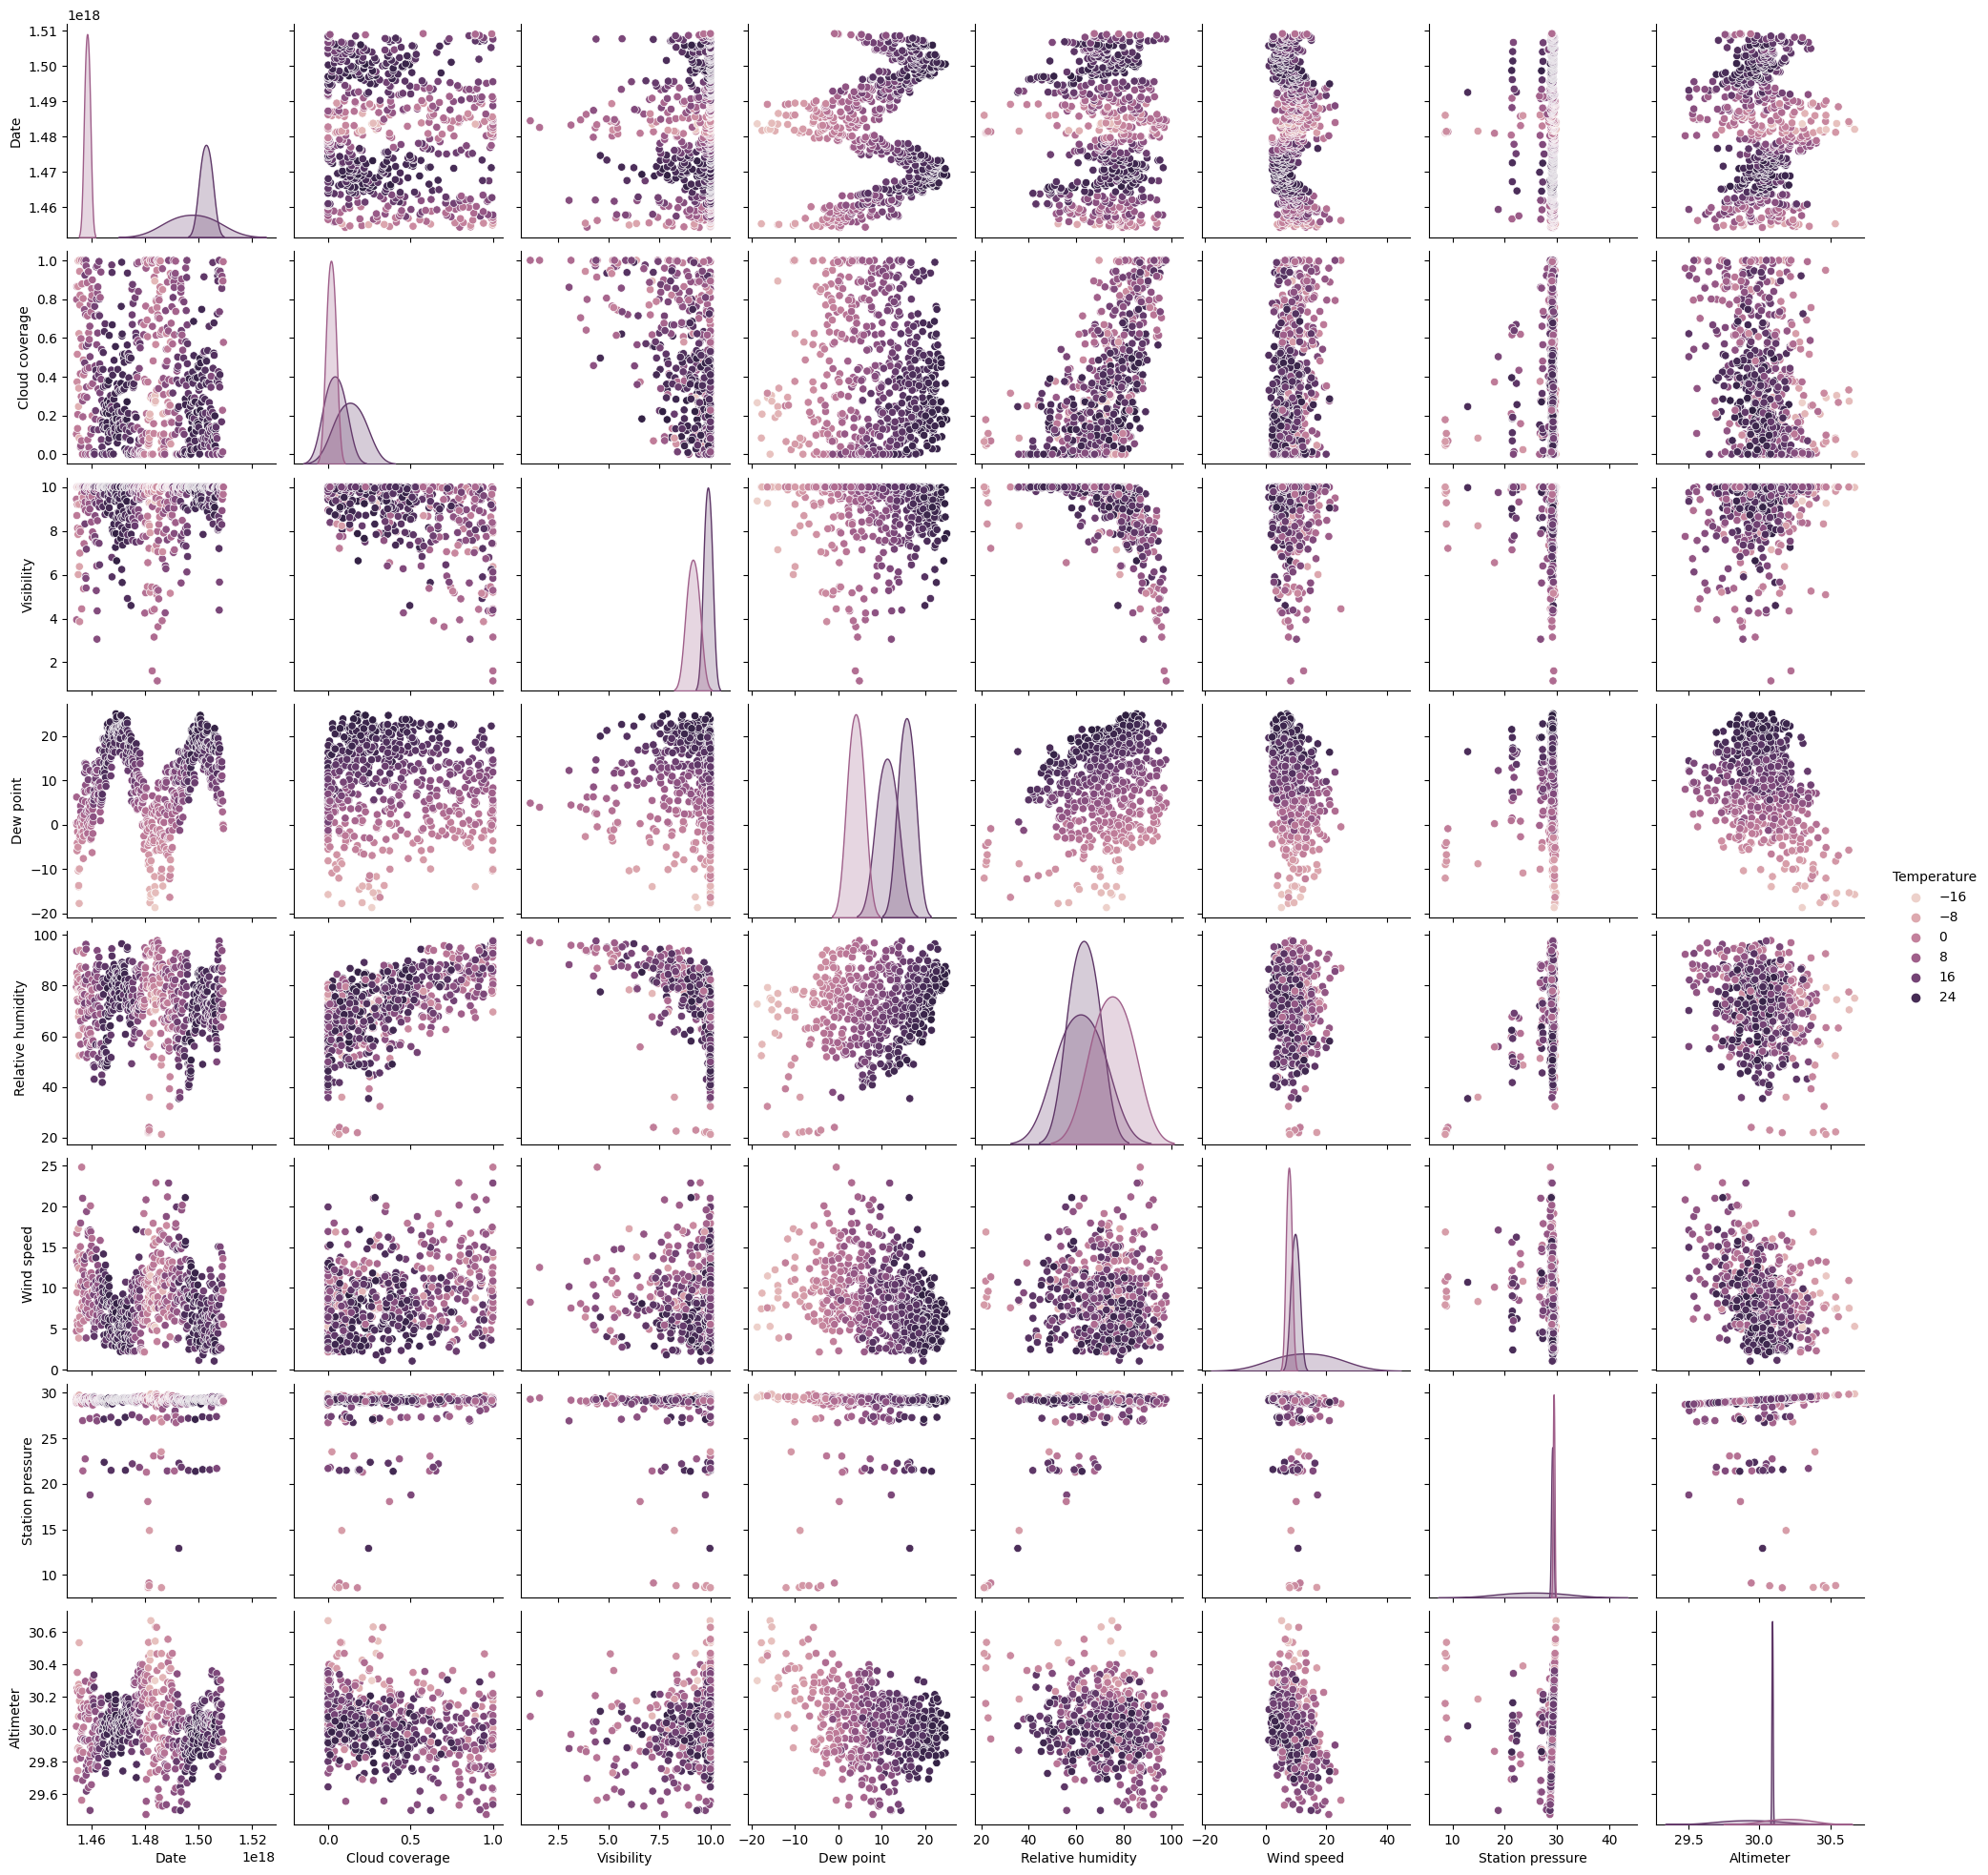

In [68]:
#y=train_dialy['Solar energy']
sns.pairplot(new_df,hue="Temperature")

In [27]:
train_dialy.columns

Index(['Date', 'Cloud coverage', 'Visibility', 'Temperature', 'Dew point',
       'Relative humidity', 'Wind speed', 'Station pressure', 'Altimeter',
       'Solar energy', 'month', 'day'],
      dtype='object')

In [28]:
X=train_dialy[['Date', 'Cloud coverage', 'Visibility', 'Temperature', 'Dew point',
       'Relative humidity', 'Wind speed', 'Station pressure', 'Altimeter'
      ]]
y=train_dialy[ "Solar energy"]

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [30]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
X_train
y_train

(477, 9) (160, 9) (477,) (160,)


602    24911
380    31502
79     14632
23      1468
199    27377
       ...  
71     38978
106    12923
270    21889
435    21140
102    32097
Name: Solar energy, Length: 477, dtype: int64

Text(0.5, 1.0, 'Energy vs Predicted Elec.: $Y_i$ vs $\\hat{Y}_i$')

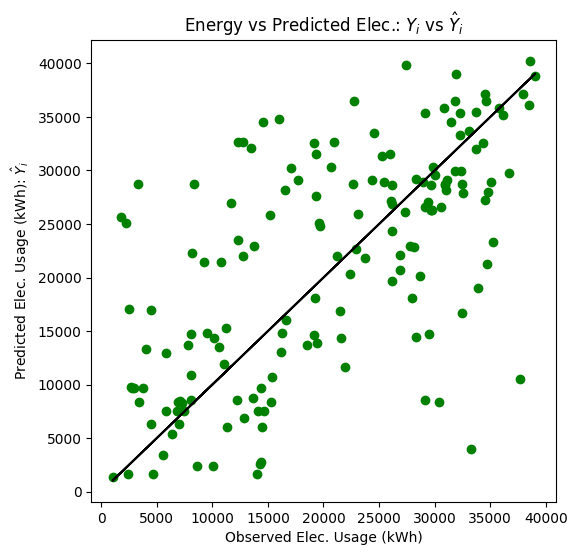

In [74]:

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)
fig = plt.figure(figsize=(6,6))
plt.plot(y_test, y_test, c='k')
plt.scatter(y_test, test_pred, c='g')
plt.xlabel('Observed Elec. Usage (kWh)')
plt.ylabel("Predicted Elec. Usage (kWh): $\hat{Y}_i$")
plt.title("Energy vs Predicted Elec.: $Y_i$ vs $\hat{Y}_i$")

Text(0.5, 1.0, 'Energy vs Predicted Elec.: $Y_i$ vs $\\hat{Y}_i$')

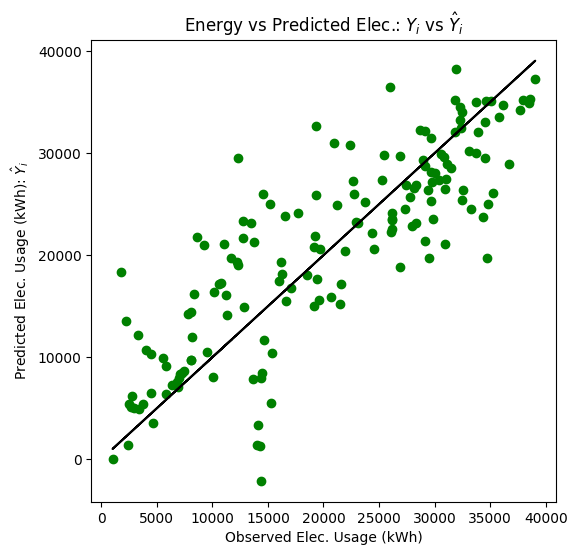

In [73]:
from lightgbm import LGBMRegressor
model=LGBMRegressor()
model.fit(X_train, y_train)
fig = plt.figure(figsize=(6,6))
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)
plt.plot(y_test, y_test, c='k')
plt.scatter(y_test, test_pred, c='g')
plt.xlabel('Observed Elec. Usage (kWh)')
plt.ylabel("Predicted Elec. Usage (kWh): $\hat{Y}_i$")
plt.title("Energy vs Predicted Elec.: $Y_i$ vs $\hat{Y}_i$")

Text(0.5, 1.0, 'Energy vs Predicted Elec.: $Y_i$ vs $\\hat{Y}_i$')

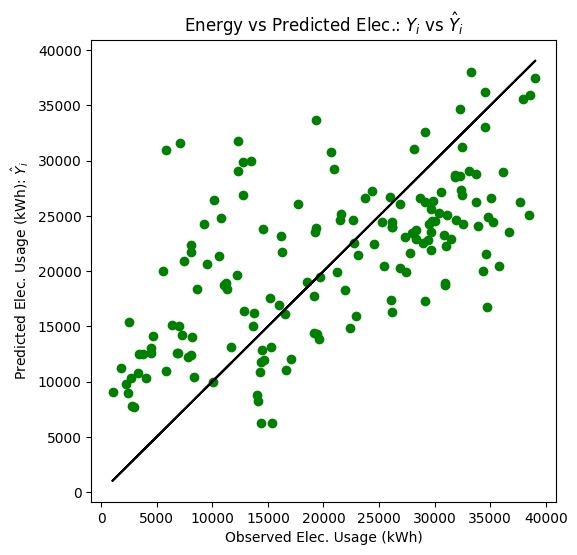

In [72]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)
fig = plt.figure(figsize=(6,6))
plt.plot(y_test, y_test, c='k')
plt.scatter(y_test, test_pred, c='g')
plt.xlabel('Observed Elec. Usage (kWh)')
plt.ylabel("Predicted Elec. Usage (kWh): $\hat{Y}_i$")
plt.title("Energy vs Predicted Elec.: $Y_i$ vs $\hat{Y}_i$")

Text(0.5, 1.0, 'Energy vs Predicted Elec.: $Y_i$ vs $\\hat{Y}_i$')

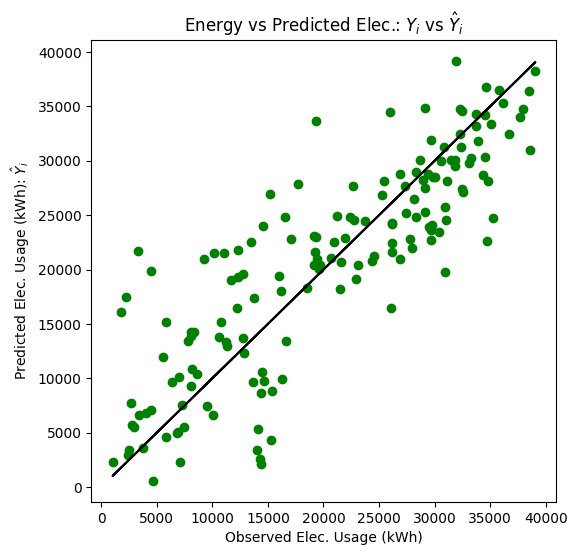

In [71]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)
fig = plt.figure(figsize=(6,6))
plt.plot(y_test, y_test, c='k')
plt.scatter(y_test, test_pred, c='g')
plt.xlabel('Observed Elec. Usage (kWh)')
plt.ylabel("Predicted Elec. Usage (kWh): $\hat{Y}_i$")
plt.title("Energy vs Predicted Elec.: $Y_i$ vs $\hat{Y}_i$")

In [35]:
train_pred=model.predict(X_train)
y_test

260     9249
228    11245
31      2916
507     8129
503    10744
       ...  
618     3423
212    20706
367    24585
83     35230
375    11702
Name: Solar energy, Length: 160, dtype: int64

In [70]:
test_pred=model.predict(X_test)
test_pred

array([20969.943  , 13320.175  ,  5485.501  , 14275.531  , 15175.845  ,
       25781.35   , 23961.96   , 30305.031  , 27628.785  , 21511.893  ,
       34806.086  , 24424.049  , 27637.965  , 34006.2    , 24084.83   ,
       25272.59   , 30090.232  , 24194.887  , 24532.     , 10876.913  ,
       36762.703  ,  5734.091  ,  5316.2603 , 24580.836  , 20456.41   ,
       28136.682  , 28155.71   ,  4618.306  ,  4320.289  ,  9677.595  ,
       26480.746  , 26958.348  , 32469.107  , 31256.264  , 34781.19   ,
       28237.195  , 21708.357  , 27887.85   ,  2272.273  , 28468.54   ,
       19828.979  , 25191.045  ,   593.89575, 13735.796  , 34254.938  ,
        2160.0286 , 11980.292  ,  3565.7842 , 24300.053  , 28723.168  ,
       23005.227  , 24808.445  , 24806.44   , 23899.773  , 10156.55   ,
       24840.754  , 10385.945  , 33614.918  , 12356.933  ,  9979.548  ,
       19799.055  , 31939.023  , 12938.896  , 24957.156  , 33344.375  ,
       21007.795  , 26854.592  , 17347.098  , 34753.777  ,  5040

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,train_pred,squared=False)

52.166325735015334

In [38]:
mean_squared_error(y_test,test_pred,squared=False)


5698.865193004202

In [84]:
model.score(X_test, y_test)

0.7159127279383681

In [ ]:
Dessision Tree : 0.000000; 9508.842278045735; 0.29912512351447773
LGBM reggressor : 1974.7142555057587; 5972.637544853962; 0.6879621126982283
XGBooster : 52.166325735015334; 5698.865193004202 ; 0.7159127279383681
Linear regression : 8516.746462239387; 8277.34478421072 ;0.40068230552382045

In [43]:
# Building the two lists for visualization
models = ['Linear Regression', 'LGBM reggressor', 'XGBooster',"Dessision Tree"]
scores = [8277.34478421072,5972.637544853962,5698.865193004202,9508.842278045735]
 
# Building the dictionary to compare the scores
mapping = {}
mapping['Linear Regression'] = scores[0]
mapping['LGBM reggressor'] = scores[1]
mapping['XGBooster'] = scores[2]
mapping['Dessision Tree'] = scores[3]
 
# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))
# Building the two lists for visualization
models = ['Linear Regression', 'LGBM reggressor', 'XGBooster',"Dessision Tree"]
r2_scores = [0.40068230552382045,0.6879621126982283,0.7159127279383681,0.29912512351447773]
 
# Building the dictionary to compare the scores
mapping = {}
mapping['Linear Regression'] = r2_scores[0]
mapping['LGBM reggressor'] = r2_scores[1]
mapping['XGBooster'] = r2_scores[2]
mapping['Dessision Tree'] = r2_scores[3]
 
# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

Linear Regression : 8277.34478421072
LGBM reggressor : 5972.637544853962
XGBooster : 5698.865193004202
Dessision Tree : 9508.842278045735
Linear Regression : 0.40068230552382045
LGBM reggressor : 0.6879621126982283
XGBooster : 0.7159127279383681
Dessision Tree : 0.29912512351447773


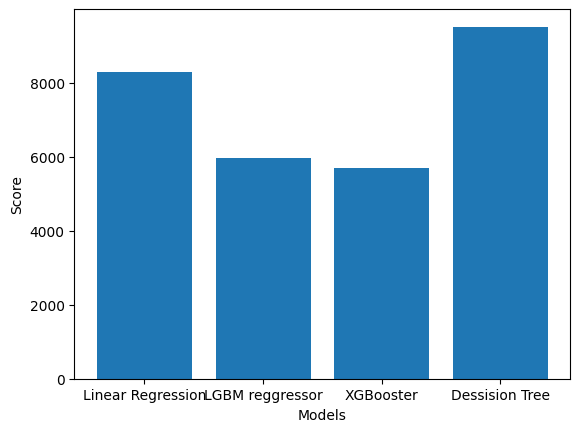

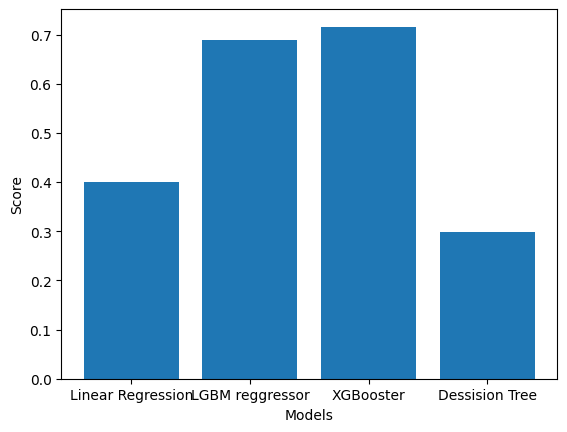

In [44]:
# Plotting the scores
plt.bar(models, scores)
plt.xlabel('Models')
plt.ylabel('Score')
plt.show()

#plotting scores
plt.bar(models, r2_scores)
plt.xlabel('Models')
plt.ylabel('Score')
plt.show()

In [ ]:
-----------------------------------------------END OF THE FILE-------------------------------------------------------------------